## Part 1 Plate Detection

### Part-1.1 Plate Number Detection

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import easyocr

In [2]:
plateCascade = cv2.CascadeClassifier('indian_license_plate.xml')

In [3]:
#detect the plate and return car + plate image
def detect_plate_no(img):
    plateImg = img.copy()
    roi = img.copy()
    plateRect = plateCascade.detectMultiScale(plateImg,scaleFactor = 1.5, minNeighbors = 7)
    for (x,y,w,h) in plateRect:
        roi_ = roi[y:y+h, x:x+w, :]
        platePart = roi[y:y+h, x:x+w, :]
        cv2.rectangle(plateImg,(x+2,y),(x+w-3, y+h-5),(0,255,0),3)
    return plateImg, platePart

In [4]:
#normal function to display 
def display_plate_no(img):
    img_ = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img_)
    plt.show()

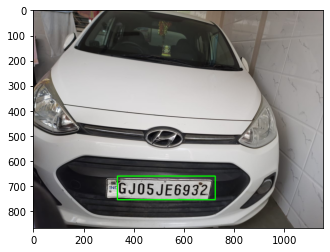

In [12]:
#test image is used for detecting plate
inputImg = cv2.imread('car.jpg')
inpImg, plate = detect_plate_no(inputImg)
display_plate_no(inpImg)

In [13]:
inputImg.shape
#len(plate)

(867, 1156, 3)

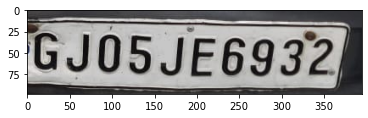

In [14]:
display_plate_no(plate)

### Part-1.2 Using Pre Created Model to Predict Text 

In [15]:
reader = easyocr.Reader(['en'])
result = reader.readtext(plate)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
plate

array([[[70, 70, 70],
        [71, 71, 71],
        [71, 70, 72],
        ...,
        [51, 47, 46],
        [51, 47, 46],
        [51, 47, 46]],

       [[69, 69, 69],
        [70, 70, 70],
        [70, 69, 71],
        ...,
        [51, 47, 46],
        [51, 47, 46],
        [52, 48, 47]],

       [[68, 68, 68],
        [69, 69, 69],
        [68, 67, 69],
        ...,
        [52, 48, 47],
        [52, 48, 47],
        [52, 48, 47]],

       ...,

       [[40, 38, 38],
        [40, 38, 38],
        [40, 39, 41],
        ...,
        [56, 52, 51],
        [55, 51, 50],
        [56, 52, 51]],

       [[32, 30, 30],
        [32, 30, 30],
        [35, 34, 36],
        ...,
        [53, 49, 48],
        [52, 48, 47],
        [52, 48, 47]],

       [[27, 25, 25],
        [27, 25, 25],
        [29, 28, 30],
        ...,
        [48, 44, 43],
        [48, 44, 43],
        [47, 43, 42]]], dtype=uint8)

In [17]:
final_result = result[0][1]
n=""
f = final_result.split('-')
f = n.join(f)
f = f.replace(" ","")
plate_number = f.upper()

In [18]:
plate_number

'GJO5JE6932'